
Βαρδής Γεωργίλας-3210027
#### <span style="color:red">To run this file correctly you need to have into the same directory of the .ipynb file the mosleh_et_al_data.csv.</span>

<h1 align="center">Εργασία 2</h1> 



In [1]:
!pip install pandas
!pip install scipy
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn
!pip install statsmodels


You should consider upgrading via the '/Users/vardisgeorgilas/.pyenv/versions/3.9.7/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/vardisgeorgilas/.pyenv/versions/3.9.7/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/vardisgeorgilas/.pyenv/versions/3.9.7/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/vardisgeorgilas/.pyenv/versions/3.9.7/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/vardisgeorgilas/.pyenv/versions/3.9.7/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/vardisgeorgilas/.pyenv/versions/3.9.7/bin/python3.9 -m pip install --upgrade pip' command.


## Twitter Suspensions after the 2020 Election


In [2]:
import pandas as pd
import scipy.stats as stats
from IPython.display import display, HTML
import os

notebook_dir = os.getcwd()
file_path = os.path.join(notebook_dir, 'mosleh_et_al_data.csv')

df = pd.read_csv(file_path)

crosstab = pd.crosstab(df['politics_hashtag'], df['suspended'])

suspension_likelihood = crosstab.apply(lambda row: row[1] / row.sum(), axis=1)


display(HTML("<h2>Crosstabulation</h2>"))

display(crosstab)

display(HTML("<h2>\nSuspension Likelihood</h2>"))

print(f"#Trump2020: {suspension_likelihood[1]:.3f}")
print(f"#VoteBidenHarris2020: {suspension_likelihood[0]:.3f} ")
print(f"\nSuspension is approximately {suspension_likelihood[1] / suspension_likelihood[0]:.2f} times more likely for #Trump2020.")



suspended,0,1
politics_hashtag,,
0,4295,200
1,3623,882


#Trump2020: 0.196
#VoteBidenHarris2020: 0.044 

Suspension is approximately 4.40 times more likely for #Trump2020.


In [3]:
chi2, p_val, dof, ex = stats.chi2_contingency(crosstab)

ex = ex.round(2)

display(HTML("<h2>Chi-Square Test Results</h2>"))

print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"P-Value: {p_val:.2e}")

display(HTML("<h2>Expected Values</h2>"))


# Display the DataFrame
display(pd.DataFrame(ex, columns=['suspended 0', 'suspended 1'], 
                     index=['politics_hashtag 0', 'politics_hashtag 1']))

Chi-Square Statistic: 485.47
P-Value: 1.38e-107


,suspended 0,suspended 1
politics_hashtag 0,3954.6,540.4
politics_hashtag 1,3963.4,541.6


 Το αποτέλεσμα του $\chi^2$ τεστ δείχνει ότι υπάρχει εξαιρετικά στατιστικά σημαντική συσχέτιση μεταξύ της χρήσης του hashtag #Trump2020 και της αναστολής των λογαριασμών, με p-value 1.38e-107,το οποίο είναι πολύ μικρότερο από το όριο σημαντικότητας 0.05. Αυτό υποδηλώνει ότι οι λογαριασμοί που χρησιμοποίησαν το #Trump2020 είναι πολύ πιο πιθανό να ανασταλούν σε σχέση με εκείνους που χρησιμοποίησαν το #VoteBidenHarris2020, και η συσχέτιση αυτή δεν μπορεί να αποδοθεί σε τυχαία διακύμανση.

Επιπλέον, η υψηλή τιμή του $\chi^2$ όσο και η διαφορά μεταξύ των παρατηρούμενων και αναμενόμενων συχνοτήτων είναι τόσο μεγάλη που μας επιτρέπει να καταλήξουμε στο συμπέρασμα ότι η πιθανότητα αναστολής δεν είναι τυχαία, αλλά μάλλον αποτέλεσμα μιας σημαντικης διαφοράς μεταξύ των ομάδων.

# Distributions of Relative Frequency of Low Quality


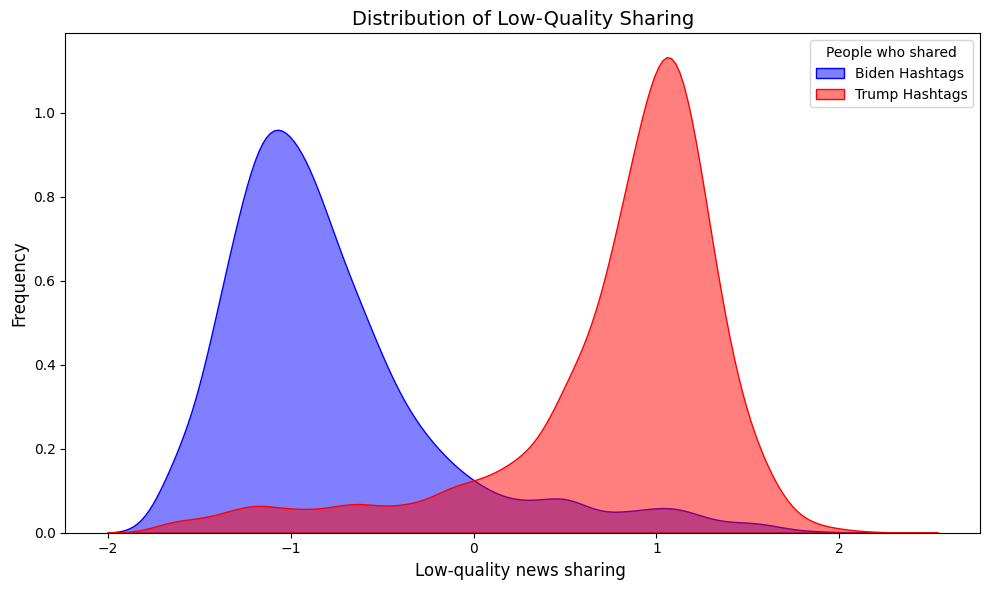

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore



df = df.dropna(subset=['lowqual_pr2019_fc'])  # remove nans
df['lowqual_pr2019_fc_zscore'] = zscore(df['lowqual_pr2019_fc'])

grouped = df.groupby('politics_hashtag')

plt.figure(figsize=(10, 6))

sns.kdeplot(df[df['politics_hashtag'] == 0]['lowqual_pr2019_fc_zscore'], label="Biden Hashtags", color="blue", fill=True, alpha=0.5)
sns.kdeplot(df[df['politics_hashtag'] == 1]['lowqual_pr2019_fc_zscore'], label="Trump Hashtags", color="red", fill=True, alpha=0.5)

# Add labels and title

plt.title('Distribution of Low-Quality Sharing', fontsize=14)
plt.xlabel('Low-quality news sharing ', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='People who shared')

# Show the plot
plt.tight_layout()
plt.show()


### Low-quality sharing as determined by crowdsourcing

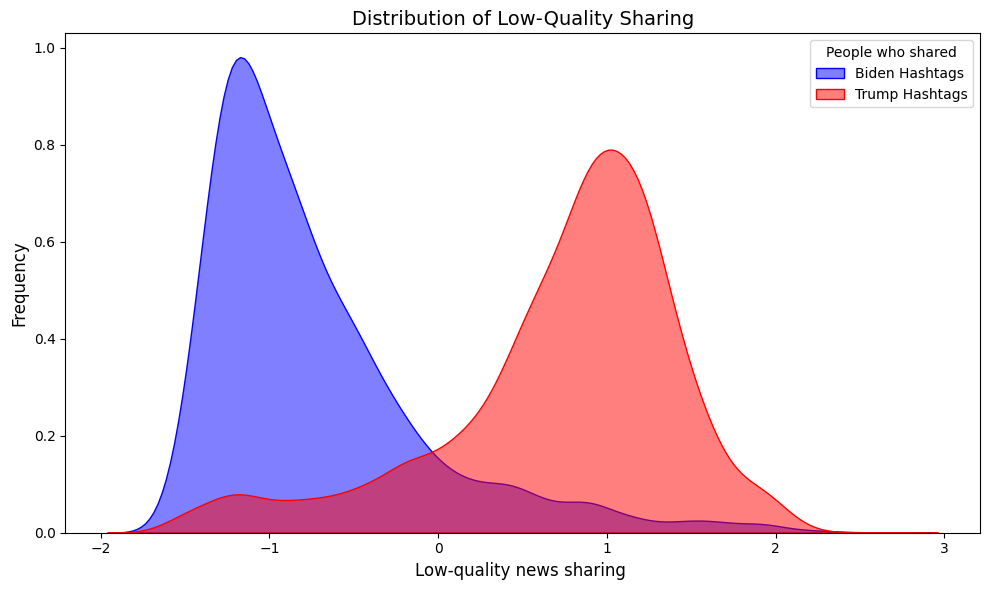

In [5]:

df = df.dropna(subset=['lowqual_pr2019_crowd'])  # remove nans
df['lowqual_pr2019_crowd_zscore'] = zscore(df['lowqual_pr2019_crowd'])

grouped = df.groupby('politics_hashtag')


plt.figure(figsize=(10, 6))

sns.kdeplot(df[df['politics_hashtag'] == 0]['lowqual_pr2019_crowd_zscore'], label="Biden Hashtags", color="blue", fill=True, alpha=0.5)
sns.kdeplot(df[df['politics_hashtag'] == 1]['lowqual_pr2019_crowd_zscore'], label="Trump Hashtags", color="red", fill=True, alpha=0.5)

# Add labels and title
plt.title('Distribution of Low-Quality Sharing', fontsize=14)
plt.xlabel('Low-quality news sharing ', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='People who shared')

# Show the plot
plt.tight_layout()
plt.show()


### Results of the t-statistic for these two groups

In [6]:

groups = df.groupby('politics_hashtag')

t_stats = {}
p = {}
for group, data in groups:
    
    x1 = data['lowqual_pr2019_fc_zscore']
    x2 = data['lowqual_pr2019_crowd_zscore']
    t_stat, p_value = stats.ttest_ind(x1, x2)
    t_stats[group] = t_stat
    p[group] = p_value

df_t_stats = pd.DataFrame(list(t_stats.items()), columns=['Group', 'T-statistic'])
df_t_stats['P-value'] = df_t_stats['Group'].map(p) #

df_t_stats['T-statistic'] = df_t_stats['T-statistic'].apply(lambda x: f"{x:.3f}".rstrip('0').rstrip('.'))
df_t_stats['P-value'] = df_t_stats['P-value'].apply(lambda x: f"{x:.3f}" if x > 0.0001 else "<0.0001")

df_t_stats.style.hide(axis='index')




Group,T-statistic,P-value
0,-3.665,0.000
1,3.415,0.001


# Low-quality News Sharing on Twitter

In [7]:
def cohen(group1, group2):
    n1, n2 = len(group1), len(group2)
    s1, s2 = np.std(group1, ddof=1), np.std(group2, ddof=1)
    s = np.sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
    means = np.mean(group1) - np.mean(group2)
    return means / s

def hedges(group1, group2):
    d = cohen(group1, group2)
    n1, n2 = len(group1), len(group2)
    correction = 1 - (3 / (4 * (n1 + n2) - 9)) * d
    return correction


In [8]:

columns = [
    'lowqual_pr2019_fc', 'lowqual_afm', 'lowqual_mbfc',
    'lowqual_lasser2019', 'lowqual_pr2019_crowd', 'lowqual_pr2019_crowdrep'
]

df = df.dropna(subset=columns)

results=[]
for c in columns:
    group_a = df[df['politics_hashtag'] == 1][c]
    group_b = df[df['politics_hashtag'] == 0][c]

    t_stat, p_value = stats.ttest_ind(group_a, group_b)
    d = cohen(group_a, group_b)
    g = hedges(group_a, group_b)

    # Store results
    results.append({
        'Variable': c,
        't_stat': t_stat,
        'p_value': p_value,
        "Cohen's d": d,
        "Hedges' g": g
    })

results_df = pd.DataFrame(results)
results_df['p_value'] = results_df['p_value'].apply(lambda x: f"{x:.4f}" if x > 0.0001 else "<0.0001")

display(results_df)

,Variable,t_stat,p_value,Cohen's d,Hedges' g
0,lowqual_pr2019_fc,119.318095,<0.0001,2.523332,0.999788
1,lowqual_afm,102.765003,<0.0001,2.173268,0.999818
2,lowqual_mbfc,98.356138,<0.0001,2.080029,0.999826
3,lowqual_lasser2019,102.918138,<0.0001,2.176506,0.999817
4,lowqual_pr2019_crowd,102.534061,<0.0001,2.168384,0.999818
5,lowqual_pr2019_crowdrep,61.109731,<0.0001,1.292345,0.999892


* Οι υψηλές τιμές του t-statistic υποδηλώνουν ότι οι διαφορές είναι στατιστικά ισχυρές και οι διακυμάνσεις ανάμεσα στις δύο ομάδες είναι σημαντικές. Οι δείκτες Cohen's d και Hedges' g μας δείχνουν ότι η επίδραση των διακυμάνσεων είναι πολύ μεγάλη, υποδεικνύοντας ισχυρές διαφοροποιήσεις μεταξύ των χρηστών του #Trump2020 και του #VoteBidenHarris2020. 

## Sharing Lower-quality News Sources and Conservative Ideology

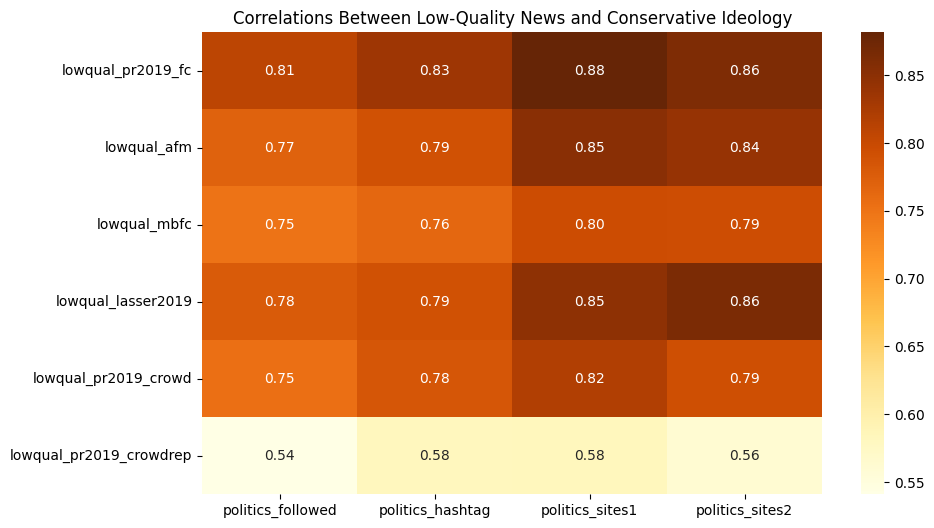

In [9]:
p_columns = [
    'politics_followed', 'politics_hashtag', 'politics_sites1', 'politics_sites2'
]
df = df.dropna(subset=p_columns)

correlation_matrix = df[columns + p_columns].corr()
heatmap_data = correlation_matrix.loc[columns, p_columns]

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlOrBr", cbar=True)
plt.title("Correlations Between Low-Quality News and Conservative Ideology")
plt.show()

### Συμπεράσματα

Συμφωνα με το heatmap παρατηρούμε μια σταθερή και ισχυρή θετική συσχέτιση μεταξύ των δεικτών χαμηλής ποιότητας ειδήσεων και της συντηρητικής πολιτικής ιδεολογίας. Συγκεκριμένα, οι περισότερες συσχετίσεις είναι ιδιαίτερα υψηλές και κυμαίνονται από περίπου 0.75 έως και 0.88. Αυτό υποδηλώνει ότι άτομα με συντηρητικές ιδεολογίες είναι πιο πιθανό να αλληλεπιδρούν ή να μοιράζονται περιεχόμενο από πηγές χαμηλής ποιότητας.
Αξίζει να σημειωθεί ότι οι συσχετίσεις με το lowqual_pr2019_crowdrep, όπου είναι αξιολογήσεις από Ρεπουμπλικανούς συμμετέχοντες, είναι αισθητά χαμηλότερες, με τιμές από 0.54 έως και 0.58. Αυτή η διαφορά μπορεί να υπάρχει λόγω της διαφορετικής μεθοδολογίας ή των κριτηρίων που χρησιμοποιήθηκαν για την αξιολόγηση της ποιότητας των ειδήσεων από τους Ρεπουμπλικάνους αλλά και από το γεγονός οτι μπορεί να είναι λιγότερο αντικειμενικές ή συνεπείς σε σύγκριση με τις αξιολογήσεις από επαγγελματίες ή ειδικούς, επηρεάζοντας έτσι τις συσχετίσεις.


# Explain suspension using single predictors

In [10]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from statsmodels.discrete.discrete_model import Probit
from statsmodels.tools.tools import add_constant

predictors = [
    'politics_hashtag', 'politics_sites1', 'politics_sites2', 
    'politics_followed', 'lowqual_afm', 'lowqual_mbfc', 
    'lowqual_lasser2019', 'lowqual_pr2019_fc', 'lowqual_pr2019_crowd'
]
df = df.dropna(subset=predictors + ['suspended'])

X = df[predictors]
y = df['suspended']  

model = Probit(y, X).fit()
y_pred = model.predict(X) 


Optimization terminated successfully.
         Current function value: 0.304244
         Iterations 7


In [11]:
from sklearn.utils import resample
import numpy as np
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm


n_bootstrap = 100
auc_results = {}

for predictor in predictors:
    aucs = []
    for _ in range(n_bootstrap):

        X_resampled, y_resampled = resample(X[[predictor]], y)
        X_resampled = add_constant(X_resampled)

        model = Probit(y_resampled, X_resampled).fit(disp=0)
        y_pred = model.predict(X_resampled)

        auc = roc_auc_score(y_resampled, y_pred)
        aucs.append(auc)

    auc_mean = np.mean(aucs)
    auc_ci = np.percentile(aucs, [2.5, 97.5])
    auc_results[predictor] = {'mean': auc_mean, 'ci': auc_ci}

t = pd.DataFrame([
    {'Predictor': predictor, 
     'AUC Mean': auc_results[predictor]['mean'], 
     '95% CI Lower': auc_results[predictor]['ci'][0], 
     '95% CI Upper': auc_results[predictor]['ci'][1]}
    for predictor in auc_results
])

display(t)

,Predictor,AUC Mean,95% CI Lower,95% CI Upper
0,politics_hashtag,0.697025,0.683969,0.708819
1,politics_sites1,0.717238,0.698358,0.734286
2,politics_sites2,0.721252,0.707512,0.733590
3,politics_followed,0.715112,0.700844,0.734945
4,lowqual_afm,0.733388,0.718409,0.748502
5,lowqual_mbfc,0.723501,0.704556,0.741691
6,lowqual_lasser2019,0.721617,0.708662,0.734916
7,lowqual_pr2019_fc,0.715948,0.701011,0.730975
8,lowqual_pr2019_crowd,0.702743,0.689191,0.717981


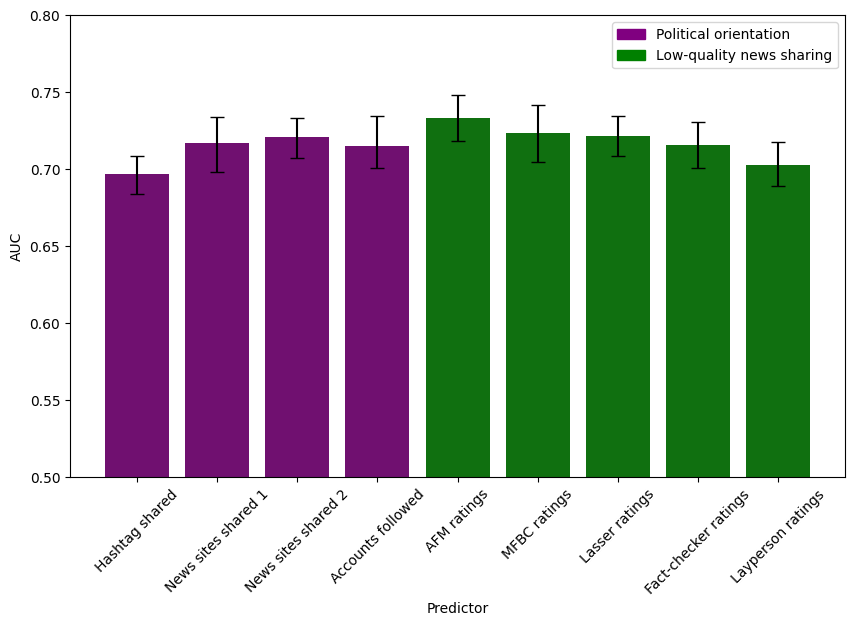

In [12]:
preseted = ['Hashtag shared', 'News sites shared 1', 'News sites shared 2', 'Accounts followed', 'AFM ratings', 
              'MFBC ratings', 'Lasser ratings', 'Fact-checker ratings', 'Layperson ratings']

colors = ['purple'] * 4 + ['green'] * 5

auc_df = pd.DataFrame({
    'Predictor': preseted,
    'AUC': [auc_results[p]['mean'] for p in predictors],
    'Lower CI': [auc_results[p]['ci'][0] for p in predictors],
    'Upper CI': [auc_results[p]['ci'][1] for p in predictors]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Predictor', y='AUC', hue='Predictor', data=auc_df, dodge=False, palette=colors, capsize=0.1, legend=False)
plt.errorbar(x=range(len(auc_df)), y=auc_df['AUC'], 
             yerr=[auc_df['AUC'] - auc_df['Lower CI'], auc_df['Upper CI'] - auc_df['AUC']], 
             fmt='none', c='black', capsize=5)
           
plt.ylim(0.5, 0.8)
plt.xticks(rotation=45)
plt.ylabel('AUC')

import matplotlib.patches as mpatches
purple = mpatches.Patch(color='purple', label='Political orientation') 
green = mpatches.Patch(color='green', label='Low-quality news sharing') 
plt.legend(handles=[purple, green], loc='upper right')
plt.show()


* Τα παραπάνω δεδομένα δείχνουν ότι οι παράγοντες που σχετίζονται με πολιτικά hashtags και ιστοσελίδες αποδεικνύονται αρκετά αξιόπιστοι για την πρόβλεψη, με τις τιμές AUC να κυμαίνονται από 0.698 έως 0.722. Η μεταβλητή politics_sites2 έχει την καλύτερη απόδοση, υποδεικνύοντας ότι συμβάλλει περισσότερο στην ακρίβεια της πρόβλεψης. Παράλληλα, οι παράμετροι που σχετίζονται με παραπληροφόρηση, όπως η lowqual_afm, εμφανίζονται να είναι οι πιο ισχυροί παράγοντες πρόβλεψης. Συνολικά, οι παράγοντες που αφορούν την παραπληροφόρηση και την πολιτική τοποθέτηση είναι οι πιο σημαντικοί στην αναστολή των λογαριασμών.

# Explain suspension using multiple predictors

In [13]:
notebook_dir = os.getcwd()
file_path = os.path.join(notebook_dir, 'mosleh_et_al_data.csv')

df = pd.read_csv(file_path)
df = df.fillna(df.mean())

df['log_repeated_tweet_count'] = np.log10(df['repeated_tweet_count'] + 1)
df['log_freq_pr_1h'] = np.log10(df['freq_pr_1h'] + 1)
df['log_num_followers'] = np.log10(df['num_followers'] + 1)
df['log_num_friends'] = np.log10(df['num_friends'] + 1)
df['log_tweets_in_2wk'] = np.log10(df['tweets_in_2wk'] + 1)
df['log_botsentinel_score'] = np.log10(df['botsentinel_score'] + 1)
df['log_hashtag_ideo_std'] = np.log10(df['hashtag_ideo_std'] + 1)

df['log_fol'] = np.log10((df['num_friends'] + 1) / (df['num_followers'] + 1))


# Winsorizing
from scipy.stats.mstats import winsorize

winsorize_vars = [
    'valence_neg', 
    'valence_neu', 
    'valence_pos', 
    'barbera_std', 
    'politics_sites1_std', 
    'politics_sites2_ideo_std'
]

for x in winsorize_vars:
    df[x] = winsorize(df[x], limits=[0.01, 0.01])

winsorize_vars_upper = [
    'moral_outrage',
    'rewire_abuse',
    'rewire_hate',
    'rewire_profanity',
    'rewire_violent',
    'rewire_sexually_explicit',
    'jigsaw_toxicity',
    'jigsaw_severe_toxicity',
    'jigsaw_idenity_attack',
    'jigsaw_insult',
    'jigsaw_profanity',
    'jigsaw_threat'
]

for x in winsorize_vars_upper:
    df[x] = winsorize(df[x], limits=[0, 0.01])


In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# misinfo
x = ['lowqual_pr2019_fc', 'lowqual_afm', 'lowqual_lasser2019', 'lowqual_mbfc']
pca = PCA(n_components=1)
pc1 = pca.fit_transform(df[x])
df['pc1_misinfo'] = pc1
print("Explained variance ratio for pc1_misinfo:", pca.explained_variance_ratio_)

# politics
x = ['politics_hashtag', 'politics_followed', 'politics_sites1', 'politics_sites2']
pca = PCA(n_components=1)
pc1 = pca.fit_transform(df[x])
df['pc1_politics'] = pc1
print("Explained variance ratio for pc1_politics:", pca.explained_variance_ratio_)

df['extremity'] = np.abs(df['pc1_politics'])

# followers 
x = ['log_num_followers', 'log_num_friends', 'log_fol']
pca = PCA(n_components=1)
pc1 = pca.fit_transform(df[x])
df['pc1_fol'] = pc1
print("Explained variance ratio for pc1_fol:", pca.explained_variance_ratio_)



Explained variance ratio for pc1_misinfo: [0.89538322]
Explained variance ratio for pc1_politics: [0.91447294]
Explained variance ratio for pc1_fol: [0.82650318]


### PCA for harmful language variables

In [15]:
x = [
    'rewire_abuse', 'rewire_hate', 'rewire_profanity', 'rewire_violent', 'rewire_sexually_explicit',
    'jigsaw_toxicity', 'jigsaw_severe_toxicity', 'jigsaw_idenity_attack', 'jigsaw_insult',
    'jigsaw_profanity', 'jigsaw_threat'
]
pca = PCA(n_components=3)
pcs_harmful = pca.fit_transform(df[x])
df['pc1_harmful_language'] = pcs_harmful[:, 0]
df['pc2_harmful_language'] = pcs_harmful[:, 1]
df['pc3_harmful_language'] = pcs_harmful[:, 2]
print("Explained variance ratio for harmful language PCA:", pca.explained_variance_ratio_)

harmful_loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=x)
display(harmful_loadings)

Explained variance ratio for harmful language PCA: [0.75157568 0.10503111 0.06519097]


,PC1,PC2,PC3
rewire_abuse,0.594020,-0.360654,0.497375
rewire_hate,0.198526,-0.363932,0.149685
rewire_profanity,0.254454,0.776281,0.436828
rewire_violent,0.077919,0.007181,0.017233
rewire_sexually_explicit,0.012136,0.041883,-0.002984
jigsaw_toxicity,0.475481,-0.003171,-0.257732
jigsaw_severe_toxicity,0.097966,0.139818,-0.265914
jigsaw_idenity_attack,0.127169,0.029264,-0.418227
jigsaw_insult,0.456202,-0.043263,-0.372009
jigsaw_profanity,0.270669,0.330807,-0.194950


Η χρήση τριών κύριων συστατικών (PCs) αντί ενός είναι απαραίτητη για την αποτύπωση των διαφορετικών διαστάσεων των δεδομένων. Στην περίπτωση της επιβλαβούς γλώσσας, το πρώτο κύριο συστατικό, PC1, καταγράφει μόνο το 75.16% της διακύμανσης το οποίο μας δείχνει ότι υπάρχει ακόμα ένα σημαντικό ποσοστό της διακύμανσης που δεν εξηγείται. Το υπόλοιπο ποσοστό μπορεί να περιέχει σημαντικές πληροφορίες που σχετίζονται με διαφορετικές πτυχές ή μοτίβα στα δεδομένα. Έτσι, χρησιμοποιώντας επιπλέον κύρια συστατικά, PC2 και PC3, για να μπορούμε να καταγράψουμε και να αναλύσουμε αυτές τις επιπλέον πτυχές, προσφέροντας μια πιο πλήρη και λεπτομερή κατανόηση των δεδομένων. Καταλήγοντας τελικά στο να αποτυπώσουμε το 92,19% της διακύμανσης των δεδομένων.

### Ερμηνεία Principal Component
* Το πρώτο κύριο συστατικό εκφράζει κυρίως τις μεταβλητές όπως rewire_abuse, jigsaw_toxicity και jigsaw_insult. Αυτό υποδηλώνει ότι το PC1 αντιπροσωπεύει τη γενική επιβλαβή γλώσσα, δηλαδή τη συνολική χρήση τοξικής γλώσσας. Αφορά δηλαδή μια διάσταση που περιγράφει το γενικό επίπεδο τοξικότητας στις αναρτήσεις.

* Το δεύτερο κύριο συστατικό παρουσιάζει ισχυρές συσχετίσεις με τη μεταβλητή rewire_profanity και μέτριες συσχετίσεις με τις μεταβλητές jigsaw_profanity και jigsaw_severe_toxicity. Αυτό το συστατικό φαίνεται να συνδέεται με τη χρήση προσβλητικής ή άσεμνης γλώσσας, διαχωρίζοντας την υβριστική συμπεριφορά από άλλες μορφές τοξικότητας.

* Το τρίτο κύριο συστατικό διακρίνει δύο κατηγορίες επιβλαβούς γλώσσας: τις γενικές μορφές καταχρηστικής ή προσβλητικής συμπεριφοράς, που εκφράζονται μέσω θετικών φορτίσεων στις rewire_abuse, rewire_hate και rewire_profanity, και τις πιο στοχευμένες και προσωπικές επιθέσεις, όπως απειλές, προσβολές και επιθέσεις στην ταυτότητα, οι οποίες έχουν αρνητικές φορτίσεις στις jigsaw μεταβλητές. Το PC3 καταγράφει αυτή τη διαφοροποίηση ανάμεσα σε γενική και εστιασμένη τοξικότητα.


In [16]:

valence_vars = ['valence_neg', 'valence_neu', 'valence_pos']
pca = PCA(n_components=1)
pc1_valence = pca.fit_transform(df[valence_vars])
df['pc1_valence'] = pc1_valence
print("Explained variance ratio for pc1_valence:", pca.explained_variance_ratio_)


independent_vars = [
    'pc1_politics', 'pc1_misinfo', 'pc1_fol',
    'pc1_harmful_language', 'pc2_harmful_language', 'pc3_harmful_language',
    'pc1_valence', 'log_tweets_in_2wk', 'log_botsentinel_score', 'extremity',
    'moral_outrage', 'liwc_political', 'log_freq_pr_1h', 'log_repeated_tweet_count',
    'barbera_std', 'politics_sites1_std', 'politics_sites2_ideo_std'
]
scaler = StandardScaler()
df[independent_vars] = scaler.fit_transform(df[independent_vars])


Explained variance ratio for pc1_valence: [0.82069714]


### Probit regression to predict suspension

In [17]:
X = df[independent_vars]
X = sm.add_constant(X) 
y = df['suspended']

# Probit model
probit_model = Probit(y, X)
probit_results = probit_model.fit()
print(probit_results.summary())

Optimization terminated successfully.
         Current function value: 0.299318
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:              suspended   No. Observations:                 9000
Model:                         Probit   Df Residuals:                     8982
Method:                           MLE   Df Model:                           17
Date:                Sun, 08 Dec 2024   Pseudo R-squ.:                  0.1852
Time:                        21:05:11   Log-Likelihood:                -2693.9
converged:                       True   LL-Null:                       -3306.3
Covariance Type:            nonrobust   LLR p-value:                5.991e-250
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.4853      0.025    -58.353      0.000      -1.535

### Bonferroni and Holm-Bonferroni corrections

In [18]:
# The purpose of these corrections is to redce the likelihood of false positives when conducting multiple statistical tests.

p_values = probit_results.pvalues[1:]  
m = len(p_values)  

# Bonferroni 
b_pvalues = p_values * m
b_pvalues = np.minimum(b_pvalues, 1.0) 
b_results = pd.DataFrame({
    'variable': p_values.index,
    'original_pvalue': p_values.values,
    'bonferroni_pvalue': b_pvalues
})


# Holm-Bonferroni 
sorted_pvalues = p_values.sort_values()
h_pvalues = []
for i, (idx, pval) in enumerate(sorted_pvalues.items()):
    adjusted_pval = pval * (m - i)
    h_pvalues.append((idx, min(adjusted_pval, 1.0)))

hb_results = pd.DataFrame(h_pvalues, columns=['variable', 'holm_bonferroni_pvalue'])


# Analyze whether political orientation influences suspension

a = 0.05

b_results['significant'] = b_results['bonferroni_pvalue'] < a
hb_results['significant'] = hb_results['holm_bonferroni_pvalue'] < a

bonferroni_sig = b_results.loc[b_results['variable'] == 'pc1_politics', 'significant'].values[0]
holm_sig = hb_results.loc[hb_results['variable'] == 'pc1_politics', 'significant'].values[0]

print("Bonferroni corrections")
display(b_results)

print("Holm-Bonferroni corrections")
display(hb_results)

if bonferroni_sig or holm_sig:
    print("Political orientation influences suspension after testing corrections.")
else:
    print("Political orientation does not influence suspension after testing corrections.")


Bonferroni corrections


,variable,original_pvalue,bonferroni_pvalue,significant
pc1_politics,pc1_politics,1.269517e-02,2.158179e-01,False
pc1_misinfo,pc1_misinfo,1.756527e-07,2.986096e-06,True
pc1_fol,pc1_fol,8.296560e-01,1.000000e+00,False
pc1_harmful_language,pc1_harmful_language,8.539554e-10,1.451724e-08,True
pc2_harmful_language,pc2_harmful_language,3.097027e-03,5.264945e-02,False
pc3_harmful_language,pc3_harmful_language,9.510973e-01,1.000000e+00,False
pc1_valence,pc1_valence,2.650585e-01,1.000000e+00,False
log_tweets_in_2wk,log_tweets_in_2wk,1.010558e-60,1.717948e-59,True
log_botsentinel_score,log_botsentinel_score,1.866434e-11,3.172938e-10,True
extremity,extremity,1.037843e-11,1.764334e-10,True


Holm-Bonferroni corrections


,variable,holm_bonferroni_pvalue,significant
0,log_tweets_in_2wk,1.717948e-59,True
1,extremity,1.660549e-10,True
2,log_botsentinel_score,2.799651e-10,True
3,pc1_harmful_language,1.195538e-08,True
4,pc1_misinfo,2.283485e-06,True
5,log_freq_pr_1h,7.478240e-04,True
6,liwc_political,1.115251e-02,True
7,pc2_harmful_language,3.097027e-02,True
8,pc1_politics,1.142565e-01,False
9,barbera_std,4.410889e-01,False


Political orientation does not influence suspension after testing corrections.


# Ανάλυση Αποτελεσμάτων

Η πολιτική τοποθέτηση, pc1_politics, πριν χρησημοποιήσουμε τις διορθώσεις Bonferroni και Holm-Bonferroni φαίνεται να έχει σημαντική θετική επίδραση στην πιθανότητα αναστολής λογαριασμού. Εφόσον η τιμή P>|z| για την πολιτική τοποθέτηση είναι 0.013 η οποία είναι μικρότερη από το  επίπεδο σημαντικότητας α=0.05, αυτό σημαίνει ότι ο συντελεστής για την πολιτική τοποθέτηση είναι στατιστικά σημαντικός. Άρα, μπορούμε να απορρίψουμε την μηδενική υπόθεση, η οποία λέει ότι η πολιτική τοποθέτηση δεν επηρεάζει την αναστολή.

Το παραπάνω επιπεβαιώνεται και από το διάστημα εμπιστοσύνης για τον συντελεστή πολιτικής τοποθέτησης όπου είναι ανάμεσα στο 0.024 και το 0.200, το οποίο δεν περιλαμβάνει το 0. Αυτό επιβεβαιώνει ότι ο συντελεστής είναι στατιστικά σημαντικός και ότι η πολιτική τοποθέτηση έχει θετική σχέση με την πιθανότητα αναστολής.

### Διαφοροποίηση αποτελεσμάτων μετα την χρήση Bonferroni και Holm-Bonferroni correction

* Με την εφαρμογή της διόρθωσης Bonferroni, το p-value για την pc1_politics γίνεται 0.2158179
* Με την εφαρμογή της διόρθωσης Holm-Bonferroni, το p-value για την pc1_politics είναι 0.1142565.

Μετά την εφαρμογή των διορθώσεων τα p-values καταλήγουν να είναι μεγαλύτερα από 0.05 επομένως η μεταβλητή pc1_politics δεν είναι στατιστικά σημαντική για την πρόβλεψη της αναστολής του λογαριασμού. Οι διορθώσεις αυτές μειώνουν την πιθανότητα των ψευδών θετικών και απαιτούν αυστηρότερα όρια για να θεωρηθεί κάποια μεταβλητή σημαντική.

Από τα παραπάνω δεδομένα γίνεται αντιλιπτό οτι στην αναστολής ενός λογαριασμού σημαντικό ρόλο παίζουν μεταβλητές όπως η δραστηριότητα των tweets (tweets_in_2wk), η πολιτική ακρότητα (extremity), η παραπληροφόρηση (pc1_misinfo), και η χρήση επιβλαβούς γλώσσας (pc1_harmful_language). Ειδικότερα, η αυξημένη δραστηριότητα, η παρουσία παραπληροφόρησης και η χρήση επικίνδυνης ή επιθετικής γλώσσας αυξάνουν την πιθανότητα αναστολής του λογαριασμού. Αντίθετα, ο πολιτικός προσανατολισμός (pc1_politics) δεν φαίνεται να έχει στατιστικά σημαντική σχέση με την αναστολή, σύμφωνα με τα αποτελέσματα της ανάλυσης. Συνολικά, οι παράγοντες που σχετίζονται με την αλληλεπίδραση, την τοξικότητα και την παραπληροφόρηση φαίνεται να είναι οι πιο σημαντικοί για την αναστολή λογαριασμών.


### Logit regression to predict suspension

In [19]:
# logit regression
from statsmodels.discrete.discrete_model import Logit

logit_model = Logit(y, X)
logit_results = logit_model.fit()
print(logit_results.summary())


Optimization terminated successfully.
         Current function value: 0.298783
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              suspended   No. Observations:                 9000
Model:                          Logit   Df Residuals:                     8982
Method:                           MLE   Df Model:                           17
Date:                Sun, 08 Dec 2024   Pseudo R-squ.:                  0.1867
Time:                        21:05:12   Log-Likelihood:                -2689.1
converged:                       True   LL-Null:                       -3306.3
Covariance Type:            nonrobust   LLR p-value:                5.190e-252
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.6823      0.055    -48.969      0.000      -2.790

In [20]:

p_values_logit = logit_results.pvalues[1:] 

# Bonferroni 
b_pvalues_logit = p_values_logit * m
b_pvalues_logit = np.minimum(b_pvalues_logit, 1.0)
b_results_logit = pd.DataFrame({
    'variable': p_values_logit.index,
    'original_pvalue': p_values_logit.values,
    'bonferroni_pvalue': b_pvalues_logit
})


# Holm-Bonferroni 
sorted_pvalues_logit = p_values_logit.sort_values()
h_pvalues_logit = []
for i, (idx, pval) in enumerate(sorted_pvalues_logit.items()):
    adjusted_pval = pval * (m - i)
    h_pvalues_logit.append((idx, min(adjusted_pval, 1.0)))

hb_results_logit = pd.DataFrame(h_pvalues_logit, columns=['variable', 'holm_bonferroni_pvalue'])


b_results_logit['significant'] = b_results_logit['bonferroni_pvalue'] < a
hb_results_logit['significant'] = hb_results_logit['holm_bonferroni_pvalue'] < a


# Analyze whether political orientation influences suspension in logit model
bonferroni_sig_logit = b_results_logit.loc[b_results_logit['variable'] == 'pc1_politics', 'significant'].values[0]
holm_sig_logit = hb_results_logit.loc[hb_results_logit['variable'] == 'pc1_politics', 'significant'].values[0]

print("Bonferroni corrected p-values for logit:")
display(b_results_logit)

print("Holm-Bonferroni corrected p-values for logit:")
display(hb_results_logit)

if bonferroni_sig_logit or holm_sig_logit:
    print("Political orientation influences suspension in the logit model after testing corrections.")
else:
    print("Political orientation does not influence suspension in the logit model after testing corrections.")

Bonferroni corrected p-values for logit:


,variable,original_pvalue,bonferroni_pvalue,significant
pc1_politics,pc1_politics,9.402502e-03,1.598425e-01,False
pc1_misinfo,pc1_misinfo,5.739208e-07,9.756653e-06,True
pc1_fol,pc1_fol,8.421937e-01,1.000000e+00,False
pc1_harmful_language,pc1_harmful_language,1.999055e-09,3.398394e-08,True
pc2_harmful_language,pc2_harmful_language,9.130161e-03,1.552127e-01,False
pc3_harmful_language,pc3_harmful_language,9.630194e-01,1.000000e+00,False
pc1_valence,pc1_valence,2.649692e-01,1.000000e+00,False
log_tweets_in_2wk,log_tweets_in_2wk,8.425212e-61,1.432286e-59,True
log_botsentinel_score,log_botsentinel_score,6.193546e-13,1.052903e-11,True
extremity,extremity,9.431285e-14,1.603318e-12,True


Holm-Bonferroni corrected p-values for logit:


,variable,holm_bonferroni_pvalue,significant
0,log_tweets_in_2wk,1.432286e-59,True
1,extremity,1.509006e-12,True
2,log_botsentinel_score,9.290319e-12,True
3,pc1_harmful_language,2.798677e-08,True
4,pc1_misinfo,7.460970e-06,True
5,liwc_political,1.506948e-03,True
6,log_freq_pr_1h,2.332358e-03,True
7,pc2_harmful_language,9.130161e-02,False
8,pc1_politics,8.462252e-02,False
9,barbera_std,3.277112e-01,False


Political orientation does not influence suspension in the logit model after testing corrections.


Ομοια παρατηρούμε από τα αποτελεσματα της λογιστικής παλινδρόμησης, πριν την Bonferroni και Holm-Bonferroni διόρθωση, ότι η πολιτική τοποθέτηση, pc1_politics, έχει σημαντική θετική επίδραση στην πιθανότητα αναστολής λογαριασμού, καθώς η τιμή p-value για την πολιτική τοποθέτηση είναι 0.009 η οποία είναι μικρότερη από το  επίπεδο σημαντικότητας 0.05.

### Διαφοροποίηση αποτελεσμάτων μετα την χρήση Bonferroni και Holm-Bonferroni correction στο μοντέλο Logit

Παρατειρούμε ότι και στο μοντέλο αυτό η πολιτική τοποθέτηση δεν έχει στατιστική σημασία με την αναστολή του λογαριασμού μετά την εφαρμογή των διορθώσεων. Παρόλο που το αρχικό p-value ήταν μικρότερο από 0.05, οι διορθώσεις αυτές αύξησαν το p-value πέρα από το όριο στατιστικής σημαντικότητας. Αυτό υποδεικνύει ότι η πολιτική τοποθέτηση του χρήστη δεν είναι επαρκώς ισχυρή πρόβλεψη για την αναστολή λογαριασμού, ιδιαίτερα όταν λαμβάνονται υπόψη αυστηρότερα κριτήρια για την αποφυγή ψευδών θετικών αποτελεσμάτων.

Ωστόσο, άλλες μεταβλητές, όπως η συχνότητα δραστηριότητας στα tweets, η πολιτική ακρότητα , η χρήση επιβλαβούς γλώσσας  και οι δείκτες παραπληροφόρησης, παραμένουν στατιστικά σημαντικές ακόμη και μετά τις διορθώσεις. Αυτό επιβεβαιώνει ότι οι σημαντικότεροι παράγοντες που συνδέονται με την αναστολή λογαριασμών σχετίζονται κυρίως με τη συμπεριφορά του χρήστη και τη φύση του περιεχομένου που κοινοποιεί, και όχι με την πολιτική του τοποθέτηση.


# Συγκριτική Ανάλυση Logit και Probit Μοντέλου  

Και στα δύο μοντέλα, Logit και Probit, αναδεικνύονται κοινοί παράγοντες που επηρεάζουν την πιθανότητα αναστολής ενός λογαριασμού. Συγκεκριμένα, η αυξημένη δραστηριότητα των tweets, η διάδοση παραπληροφόρησης, η χρήση τοξικής ή επιβλαβούς γλώσσας και η πολιτική ακρότητα  φαίνεται να παίζουν καθοριστικό ρόλο. 

Ωστόσο, η πολιτική τοποθέτηση δεν αναδεικνύεται ως στατιστικά σημαντική μετά την εφαρμογή των διορθώσεων Bonferroni και Holm-Bonferroni. Αυτές οι διορθώσεις μειώνουν την πιθανότητα ψευδών θετικών, απαιτώντας αυστηρότερα κριτήρια για να θεωρηθεί μια μεταβλητή σημαντική. Ενώ και στα δύο μοντέλα η πολιτική τοποθέτηση φάνηκε αρχικά σημαντική, η προσαρμογή των p-values έδειξε ότι η σχέση αυτή μπορεί να μην είναι στατιστικά αξιόπιστη. Τα αποτελέσματα αναδικνήουν ότι οι αναστολές βασίζονται κυρίως σε ενέργειες που σχετίζονται με τη συμπεριφορά και όχι άμεσα με την πολιτική τοποθέτηση.
